In [2]:
data = read.csv('housing.data.txt',sep = '',header = FALSE)

In [3]:
head(data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
length(data$V1)

[1] 506

In [13]:
library(normtest)
library(nortest)

Целевой признак - V14. Попробуем предсказывать его с помощью различных линейных регрессий на 3 наборах признаков: (1,3,5) , (6,7,8), (11,12,13).

1,6,11
3,7,12
5,8,13


Warning message in cvm.test(ost):
“p-value is smaller than 7.37e-10, cannot be computed more accurately”

[1] TRUE TRUE TRUE TRUE


Warning message in cvm.test(ost):
“p-value is smaller than 7.37e-10, cannot be computed more accurately”

[1] TRUE TRUE TRUE TRUE


Warning message in cvm.test(ost):
“p-value is smaller than 7.37e-10, cannot be computed more accurately”

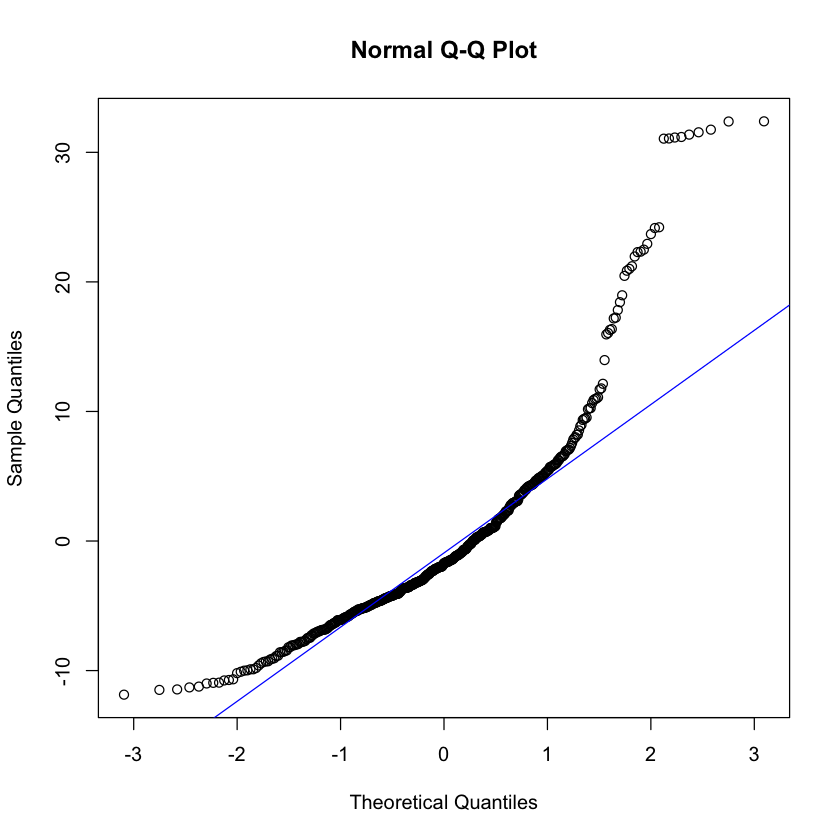

[1] TRUE TRUE TRUE TRUE


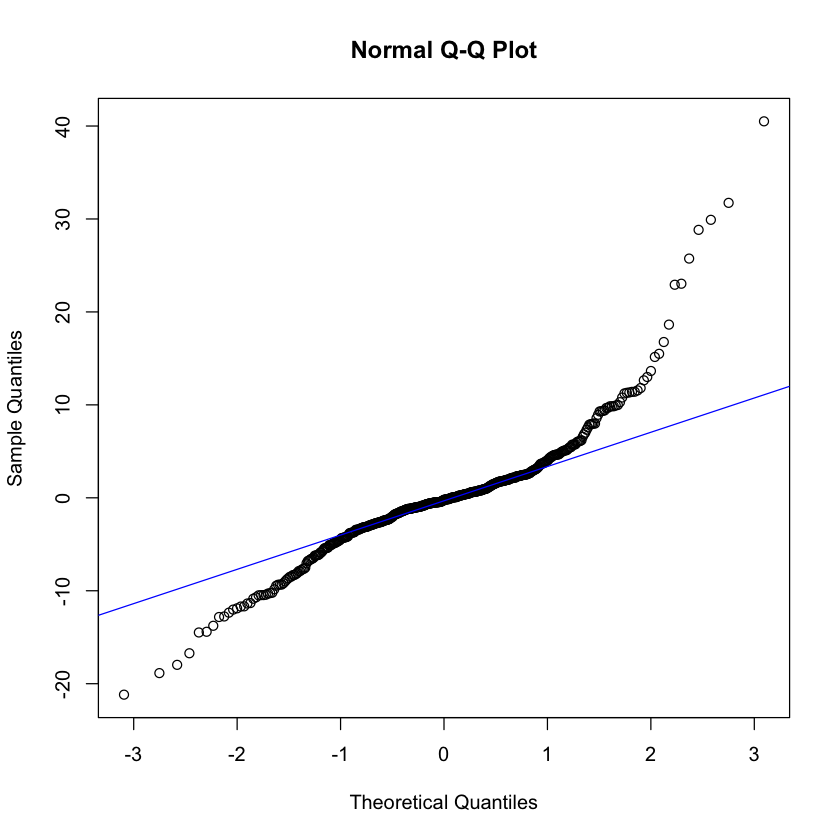

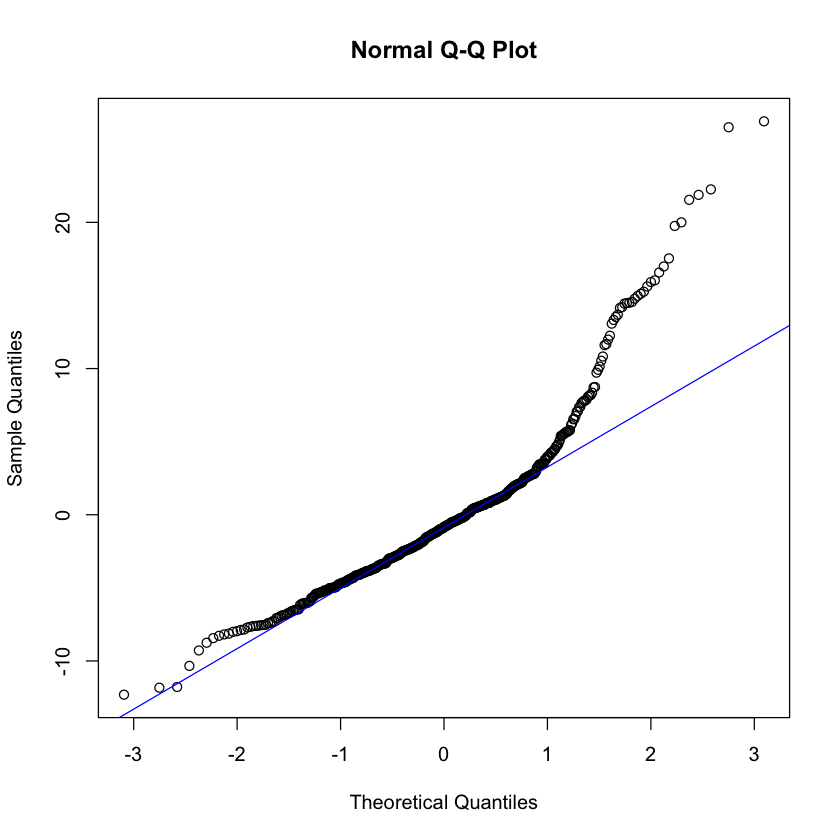

In [47]:
col = matrix(c(1,3,5,6,7,8,11,12,13),nrow=3)
col
y<-data$V14
for (i in 1:3) {
    fit<-lm(data$V14 ~ data[,col[1,i]] + data[,col[2,i]] + data[,col[3,i]])
    pred<-as.numeric(predict(fit, data[14]))
    ost<-data$V14 - pred
    pvals <- c(lillie.test(ost)$p.value,
                ad.test(ost)$p.value,
                cvm.test(ost)$p.value,
                shapiro.test(ost)$p.value)
    corrected_pvals <- p.adjust(pvals, method = 'holm')
    print(corrected_pvals < 0.05)
    qqnorm(ost)
    qqline(ost, col = 4)
}

Остатки от 3 набора регрессоров немного похожи на нормальные судя по qq-plot. Но тем не менее график достаточно сильно начинает отклоняться. Множественная проверка отвергает нормальность на уровне 0.05.